In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Download the codeSearchNetChallenge dataset 
_If needed_

In [2]:
%run downloading_cleaning_codeSearchNetChallenge_dataset.ipynb

CodeSearchNet challenge dataset ready to use!


## Exporting the codeSearchNetChallenge dataset to CSV files

_If needed_

In [3]:
%run preparing_csv_files_from_codeSearchNetChallenge_dataset.ipynb

Total lines of Python code in the dataset (after removing empty lines)
11206193


Total lines of Python code in the dataset's train folder (after removing empty lines)
10054266


Total lines of Python in the dataset's test folder (after removing empty lines)
541338


Total lines of Python in the dataset's valid folder
610589


Source: https://dev.fast.ai/tutorial.transformers

In [4]:
import torch
torch.cuda.set_device(1)
print ('Current cuda device ', torch.cuda.current_device())

Current cuda device  1


In [5]:
from transformers import GPT2LMHeadModel, GPT2TokenizerFast

In [6]:
pretrained_weights = 'gpt2'
tokenizer = GPT2TokenizerFast.from_pretrained(pretrained_weights)
model = GPT2LMHeadModel.from_pretrained(pretrained_weights)

Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias', 'lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
ids = tokenizer.encode('This is an example of text, and')
ids

[1212, 318, 281, 1672, 286, 2420, 11, 290]

In [8]:
tokenizer.decode(ids)

'This is an example of text, and'

In [9]:
import torch
t = torch.LongTensor(ids)[None]
preds = model.generate(t)

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


In [10]:
preds.shape,preds[0]

(torch.Size([1, 20]),
 tensor([1212,  318,  281, 1672,  286, 2420,   11,  290,  340,  338,  407,  257,
          922,  530,   13,  198,  198,  464,  717, 1517]))

In [11]:
tokenizer.decode(preds[0].numpy())

"This is an example of text, and it's not a good one.\n\nThe first thing"

In [12]:
from fastai2.text.all import *

In [13]:
codeSearchNet_challenge_path = './CodeSearchNet_challenge_dataset'
all_csv_path = './CodeSearchNet_challenge_dataset/CodeSearchNet_challenge_dataset.csv'
train_csv_path = './CodeSearchNet_challenge_dataset/python/final/jsonl/train/train_CodeSearchNet_challenge_dataset.csv'
test_csv_path = './CodeSearchNet_challenge_dataset/python/final/jsonl/test/test_CodeSearchNet_challenge_dataset.csv'
valid_csv_path = './CodeSearchNet_challenge_dataset/python/final/jsonl/valid/valid_CodeSearchNet_challenge_dataset.csv'

In [14]:
df_train = pd.read_csv(train_csv_path)
df_valid = pd.read_csv(test_csv_path)
df_train.head()

,filename,text
0,CodeSearchNet_challenge_dataset/python/final/jsonl/train/python_train_11.py,"def show_slug_with_level(context, page, lang=None, fallback=True):\n """"""Display slug with level by language.""""""\n if not lang:\n lang = context.get('lang', pages_settings.PAGE_DEFAULT_LANGUAGE)\n\n page = get_page_from_string_or_id(page, lang)\n if not page:\n return ''\n\n return {'content': page.slug_with_level(lang)}\n\n\ndef show_revisions(context, page, content_type, lang=None):\n """"""Render the last 10 revisions of a page content with a list using\n the ``pages/revisions.html`` template""""""\n if not pages_settings.PAGE_CONTENT_REVISION:\n ..."
1,CodeSearchNet_challenge_dataset/python/final/jsonl/train/python_train_8.py,"def public(self):\n """"""True if the Slot is public.""""""\n return bool(lib.EnvSlotPublicP(self._env, self._cls, self._name))\n\n\ndef initializable(self):\n """"""True if the Slot is initializable.""""""\n return bool(lib.EnvSlotInitableP(self._env, self._cls, self._name))\n\n\ndef writable(self):\n """"""True if the Slot is writable.""""""\n return bool(lib.EnvSlotWritableP(self._env, self._cls, self._name))\n\n\ndef accessible(self):\n """"""True if the Slot is directly accessible.""""""\n return bool(lib.EnvSlotDirectAccessP(self._env, self._cls, self._name))\n\n\ndef types(self):\n ..."
2,CodeSearchNet_challenge_dataset/python/final/jsonl/train/python_train_1.py,"def zmq_device(self):\n '''\n Multiprocessing target for the zmq queue device\n '''\n self.__setup_signals()\n salt.utils.process.appendproctitle('MWorkerQueue')\n self.context = zmq.Context(self.opts['worker_threads'])\n # Prepare the zeromq sockets\n self.uri = 'tcp://{interface}:{ret_port}'.format(**self.opts)\n self.clients = self.context.socket(zmq.ROUTER)\n if self.opts['ipv6'] is True and hasattr(zmq, 'IPV4ONLY'):\n # IPv6 sockets work for both IPv6 and IPv4 addresses\n self.clients.setsockopt(zmq.IPV4ONLY, 0)\n self.clients.setsockopt(..."
3,CodeSearchNet_challenge_dataset/python/final/jsonl/train/python_train_13.py,"def get_datetime_sorted_rows(dbconn, table_name, uuid=None, column=None):\n """"""\n Get a list of datetime sorted rows from a table in the database\n :param dbconn: database connection\n :param table_name: name of table in the database\n :param uuid: optional uuid to pull from\n :param column: optional column/field in the table to pull instead of rows\n :returns: a list of tuples containing (datetime, row) pairs or (datetime, column) pairs if columns is specified.\n """"""\n rows = get_rows(dbconn, table_name, uuid=uuid)\n data = []\n for r in rows:\n dt ..."
4,CodeSearchNet_challenge_dataset/python/final/jsonl/train/python_train_5.py,"def export_ruptures_csv(ekey, dstore):\n """"""\n :param ekey: export key, i.e. a pair (datastore key, fmt)\n :param dstore: datastore object\n """"""\n oq = dstore['oqparam']\n if 'scenario' in oq.calculation_mode:\n return []\n dest = dstore.export_path('ruptures.csv')\n header = ('rupid multiplicity mag centroid_lon centroid_lat '\n 'centroid_depth trt strike dip rake boundary').split()\n rows = []\n for rgetter in gen_rupture_getters(dstore):\n rups = rgetter.get_ruptures()\n rup_data = calc.RuptureData(rgetter.trt, rgetter.rlzs..."


In [15]:
df_train = df_train[["text"]]
df_valid = df_valid[["text"]]

display(df_train.head())
display(df_valid.head())

,text
0,"def show_slug_with_level(context, page, lang=None, fallback=True):\n """"""Display slug with level by language.""""""\n if not lang:\n lang = context.get('lang', pages_settings.PAGE_DEFAULT_LANGUAGE)\n\n page = get_page_from_string_or_id(page, lang)\n if not page:\n return ''\n\n return {'content': page.slug_with_level(lang)}\n\n\ndef show_revisions(context, page, content_type, lang=None):\n """"""Render the last 10 revisions of a page content with a list using\n the ``pages/revisions.html`` template""""""\n if not pages_settings.PAGE_CONTENT_REVISION:\n ..."
1,"def public(self):\n """"""True if the Slot is public.""""""\n return bool(lib.EnvSlotPublicP(self._env, self._cls, self._name))\n\n\ndef initializable(self):\n """"""True if the Slot is initializable.""""""\n return bool(lib.EnvSlotInitableP(self._env, self._cls, self._name))\n\n\ndef writable(self):\n """"""True if the Slot is writable.""""""\n return bool(lib.EnvSlotWritableP(self._env, self._cls, self._name))\n\n\ndef accessible(self):\n """"""True if the Slot is directly accessible.""""""\n return bool(lib.EnvSlotDirectAccessP(self._env, self._cls, self._name))\n\n\ndef types(self):\n ..."
2,"def zmq_device(self):\n '''\n Multiprocessing target for the zmq queue device\n '''\n self.__setup_signals()\n salt.utils.process.appendproctitle('MWorkerQueue')\n self.context = zmq.Context(self.opts['worker_threads'])\n # Prepare the zeromq sockets\n self.uri = 'tcp://{interface}:{ret_port}'.format(**self.opts)\n self.clients = self.context.socket(zmq.ROUTER)\n if self.opts['ipv6'] is True and hasattr(zmq, 'IPV4ONLY'):\n # IPv6 sockets work for both IPv6 and IPv4 addresses\n self.clients.setsockopt(zmq.IPV4ONLY, 0)\n self.clients.setsockopt(..."
3,"def get_datetime_sorted_rows(dbconn, table_name, uuid=None, column=None):\n """"""\n Get a list of datetime sorted rows from a table in the database\n :param dbconn: database connection\n :param table_name: name of table in the database\n :param uuid: optional uuid to pull from\n :param column: optional column/field in the table to pull instead of rows\n :returns: a list of tuples containing (datetime, row) pairs or (datetime, column) pairs if columns is specified.\n """"""\n rows = get_rows(dbconn, table_name, uuid=uuid)\n data = []\n for r in rows:\n dt ..."
4,"def export_ruptures_csv(ekey, dstore):\n """"""\n :param ekey: export key, i.e. a pair (datastore key, fmt)\n :param dstore: datastore object\n """"""\n oq = dstore['oqparam']\n if 'scenario' in oq.calculation_mode:\n return []\n dest = dstore.export_path('ruptures.csv')\n header = ('rupid multiplicity mag centroid_lon centroid_lat '\n 'centroid_depth trt strike dip rake boundary').split()\n rows = []\n for rgetter in gen_rupture_getters(dstore):\n rups = rgetter.get_ruptures()\n rup_data = calc.RuptureData(rgetter.trt, rgetter.rlzs..."


,text
0,"def get_vid_from_url(url):\n """"""Extracts video ID from URL.\n """"""\n return match1(url, r'youtu\.be/([^?/]+)') or \\n match1(url, r'youtube\.com/embed/([^/?]+)') or \\n match1(url, r'youtube\.com/v/([^/?]+)') or \\n match1(url, r'youtube\.com/watch/([^/?]+)') or \\n parse_query_param(url, 'v') or \\n parse_query_param(parse_query_param(url, 'u'), 'v')\n\n\ndef sina_xml_to_url_list(xml_data):\n """"""str->list\n Convert XML to URL List.\n From Biligrab.\n """"""\n rawurl = []\n dom = parseString(xml_data)\n for node in dom.getElement..."


In [16]:
all_texts = np.concatenate([df_train["text"].values, df_valid["text"].values])

In [17]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [18]:
splits = [list(range_of(df_train)), list(range(len(df_train), len(all_texts)))]
tls = TfmdLists(all_texts, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)

In [19]:
tls.train[0],tls.valid[0]

(tensor([ 4299,   905,    62,  ..., 11250,     8,   198]),
 tensor([ 4299,   651,    62,  ...,    62, 11600,   198]))

In [20]:
tls.tfms(tls.train.items[0]).shape, tls.tfms(tls.valid.items[0]).shape

(torch.Size([11983779]), torch.Size([10037607]))

In [21]:
show_at(tls.train, 0)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [22]:
show_at(tls.valid, 0)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [23]:
bs,sl = 4,1024
dls = tls.dataloaders(bs=bs, seq_len=sl)

In [24]:
dls.show_batch(max_n=5)

,text,text_
0,"def findArgs(args, prefixes):\n """"""\n Extracts the list of arguments that start with any of the specified prefix values\n """"""\n return list([\n arg for arg in args\n if len([p for p in prefixes if arg.lower().startswith(p.lower())]) > 0\n ])\n\n\ndef stripArgs(args, blacklist):\n """"""\n Removes any arguments in the supplied list that are contained in the specified blacklist\n """"""\n blacklist = [b.lower() for b in blacklist]\n return list([arg for arg in args if arg.lower() not in blacklist])\n\n\ndef capture(command, input=None, cwd=None, shell=False, raiseOnError=False):\n """"""\n Executes a child process and captures its output\n """"""\n\n # Attempt to execute the child","findArgs(args, prefixes):\n """"""\n Extracts the list of arguments that start with any of the specified prefix values\n """"""\n return list([\n arg for arg in args\n if len([p for p in prefixes if arg.lower().startswith(p.lower())]) > 0\n ])\n\n\ndef stripArgs(args, blacklist):\n """"""\n Removes any arguments in the supplied list that are contained in the specified blacklist\n """"""\n blacklist = [b.lower() for b in blacklist]\n return list([arg for arg in args if arg.lower() not in blacklist])\n\n\ndef capture(command, input=None, cwd=None, shell=False, raiseOnError=False):\n """"""\n Executes a child process and captures its output\n """"""\n\n # Attempt to execute the child"
1,"\n\n - `Dominique Makowski <https://dominiquemakowski.github.io/>`_\n\n *Dependencies*\n\n - pandas\n - bioread\n - datetime\n\n *See Also*\n\n - bioread package: https://github.com/njvack/bioread\n\n """"""\n\n # Check path\n file = path + filename\n if "".acq"" not in file:\n file += "".acq""\n if os.path.exists(file) is False:\n print(\n ""NeuroKit Error: read_acqknowledge(): couldn't find the following file: "" +\n filename)\n return()\n\n # Convert creation date\n creation_date = find_creation_date(file)\n creation_date = datetime.datetime.fromtimestamp(creation_date)\n\n","- `Dominique Makowski <https://dominiquemakowski.github.io/>`_\n\n *Dependencies*\n\n - pandas\n - bioread\n - datetime\n\n *See Also*\n\n - bioread package: https://github.com/njvack/bioread\n\n """"""\n\n # Check path\n file = path + filename\n if "".acq"" not in file:\n file += "".acq""\n if os.path.exists(file) is False:\n print(\n ""NeuroKit Error: read_acqknowledge(): couldn't find the following file: "" +\n filename)\n return()\n\n # Convert creation date\n creation_date = find_creation_date(file)\n creation_date = datetime.datetime.fromtimestamp(creation_date)\n\n"
2,"id}\n if isinstance(user_id, (tuple, list)):\n data['openid_list'] = user_id\n else:\n data['openid_list'] = [user_id, ]\n return self._post('tags/members/batchtagging', data=data)\n\n\ndef get_user_tag(self, user_id):\n """"""\n 获取用户身上的标签列表\n\n :param user_id: 用户 ID, 可以是单个或者列表\n :return: 返回的 JSON 数据包\n """"""\n return self._post(\n 'tags/getidlist',\n data={\n 'openid': user_id\n },\n result_processor=lambda x: x['tagid_list']\n )\n\n\ndef get_tag_users(self, tag_id, first_user_id=None):\n """"""\n 获取标签下粉丝列表\n\n :param tag_id: 标签 ID\n :param first_user_id: 可选。第一个拉取的 OPENID，不填默认从头开始拉取\n","}\n if isinstance(user_id, (tuple, list)):\n data['openid_list'] = user_id\n else:\n data['openid_list'] = [user_id, ]\n return self._post('tags/members/batchtagging', data=data)\n\n\ndef get_user_tag(self, user_id):\n """"""\n 获取用户身上的标签列表\n\n :param user_id: 用户 ID, 可以是单个或者列表\n :return: 返回的 JSON 数据包\n """"""\n return self._post(\n 'tags/getidlist',\n data={\n 'openid': user_id\n },\n result_processor=lambda x: x['tagid_list']\n )\n\n\ndef get_tag_users(self, tag_id, first_user_id=None):\n """"""\n 获取标签下粉丝列表\n\n :param tag_id: 标签 ID\n :param first_user_id: 可选。第一个拉取的 OPENID，不填默认从头开始拉取\n"
3,"_adata[:, gene_pool].X.toarray(), axis=0), index=gene_pool) # average expression of genes\n else:\n obs_avg = pd.Series(\n np.nanmean(_adata[:, gene_pool].X, axis=0), index=gene_pool) # average expression of genes\n\n # Sometimes (and

In [25]:
def tokenize(text):
    toks = tokenizer.tokenize(text)
    return tensor(tokenizer.convert_tokens_to_ids(toks))

tokenized = [tokenize(t) for t in progress_bar(all_texts)]

In [26]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        return x if isinstance(x, Tensor) else tokenize(x)
        
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [27]:
tls = TfmdLists(tokenized, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)
dls = tls.dataloaders(bs=bs, seq_len=sl)

In [28]:
dls.show_batch(max_n=5)

,text,text_
0,"def show_clock_output_clock_time_timezone(self, **kwargs):\n """"""Auto Generated Code\n """"""\n config = ET.Element(""config"")\n show_clock = ET.Element(""show_clock"")\n config = show_clock\n output = ET.SubElement(show_clock, ""output"")\n clock_time = ET.SubElement(output, ""clock-time"")\n timezone = ET.SubElement(clock_time, ""timezone"")\n timezone.text = kwargs.pop('timezone')\n\n callback = kwargs.pop('callback', self._callback)\n return callback(config)\n\n\ndef get_system_uptime_input_rbridge_id(self, **kwargs):\n """"""Auto Generated Code\n """"""\n config = ET.Element(""config"")\n get_system_uptime = ET.Element(""get_system_uptime"")\n config = get_system_uptime\n input = ET.SubElement(get_system_uptime, ""input"")\n rbridge_id = ET.SubElement(input, ""rbridge-id"")\n rbridge_id.text = kwargs.pop('rbridge_id')\n\n callback = kwargs.pop('callback', self._callback)\n return callback(config)\n\n\ndef get_system_uptime_output_show_system_uptime_rbridge_id(self, **kwargs):\n """"""Auto Generated Code\n """"""\n config = ET.Element(""config"")\n","show_clock_output_clock_time_timezone(self, **kwargs):\n """"""Auto Generated Code\n """"""\n config = ET.Element(""config"")\n show_clock = ET.Element(""show_clock"")\n config = show_clock\n output = ET.SubElement(show_clock, ""output"")\n clock_time = ET.SubElement(output, ""clock-time"")\n timezone = ET.SubElement(clock_time, ""timezone"")\n timezone.text = kwargs.pop('timezone')\n\n callback = kwargs.pop('callback', self._callback)\n return callback(config)\n\n\ndef get_system_uptime_input_rbridge_id(self, **kwargs):\n """"""Auto Generated Code\n """"""\n config = ET.Element(""config"")\n get_system_uptime = ET.Element(""get_system_uptime"")\n config = get_system_uptime\n input = ET.SubElement(get_system_uptime, ""input"")\n rbridge_id = ET.SubElement(input, ""rbridge-id"")\n rbridge_id.text = kwargs.pop('rbridge_id')\n\n callback = kwargs.pop('callback', self._callback)\n return callback(config)\n\n\ndef get_system_uptime_output_show_system_uptime_rbridge_id(self, **kwargs):\n """"""Auto Generated Code\n """"""\n config = ET.Element(""config"")\n"
1,"a ""\n\t\t\t""device that allows you to stab people in the face over the ""\n\t\t\t""internet"")\n\telse:\n\t\tkarma.Karma.store.change(nick, -1)\n\t\treturn (\n\t\t\t""/me turns on its master and shivs %s. This is reality man, ""\n\t\t\t""and you never know what you're going to get!"" % nick)\n\ndef disembowel(rest):\n\t""Disembowel some(one|thing)!""\n\tif rest:\n\t\tstabee = rest\n\t\tkarma.Karma.store.change(stabee, -1)\n\telse:\n\t\tstabee = ""someone nearby""\n\treturn (\n\t\t""/me takes %s, brings them down to the basement, ties them to a ""\n\t\t""leaky pipe, and once bored of playing with them mercifully ""\n\t\t""ritually disembowels them..."" % stabee)\n\ndef embowel(rest):\n\t""Embowel some(one|thing)!""\n\tif rest:\n\t\tstabee = rest\n\t\tkarma.Karma.store.change(stabee, 1)\n\telse:\n\t\tstabee = ""someone nearby""\n\treturn (\n\t\t""/me (wearing a bright pink cape and yellow tights) swoops in ""\n\t\t""through an open window, snatches %s, races out of the basement, ""\n\t\t""takes them to the hospital with entrails on ice, and mercifully ""\n\t\t""embowels them, saving the day..."" % stabee)\n\ndef chain(rest, nick):\n\t""Chain some(one|thing) down.""\n\tchainee = rest or ""someone nearby""\n\tif chainee == 'cperry':\n\t\ttmpl = ""/me ties the chains extra tight around {chainee}""\n\telif random.random() <.9:\n\t\ttmpl = (\n\t\t\t""/me","""\n\t\t\t""device that allows you to stab people in the face over the ""\n\t\t\t""internet"")\n\telse:\n\t\tkarma.Karma.store.change(nick, -1)\n\t\treturn (\n\t\t\t""/me turns on its master and shivs %s. This is reality man, ""\n\t\t\t""and you never know what you're going to get!"" % nick)\n\ndef disembowel(rest):\n\t""Disembowel some(one|thing)!""\n\tif rest:\n\t\tstabee = rest\n\t\tkarma.Karma.store.change(stabee, -1)\n\telse:\n\t\tstabee = ""someone nearby

In [29]:
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]

In [30]:
learn = Learner(dls, model, 
                loss_func=CrossEntropyLossFlat(), 
                cbs=[DropOutput,TerminateOnNaNCallback()], 
                metrics=[Perplexity(),accuracy]
               ).to_fp16()

In [31]:
learn.validate()

(#3) [2.0279176235198975,7.598247528076172,0.6411146521568298]

In [32]:
print(learn.model)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): Laye

In [33]:
print(learn.summary()) 

GPT2LMHeadModel (Input shape: ['4 x 1024'])
Layer (type)         Output Shape         Param #    Trainable 
Embedding            4 x 1024 x 768       38,597,376 True      
________________________________________________________________
Embedding            4 x 1024 x 768       786,432    True      
________________________________________________________________
Dropout              4 x 1024 x 768       0          False     
________________________________________________________________
LayerNorm            4 x 1024 x 768       1,536      True      
________________________________________________________________
Conv1D               4 x 1024 x 2304      1,771,776  True      
________________________________________________________________
Conv1D               4 x 1024 x 768       590,592    True      
________________________________________________________________
Dropout              4 x 12 x 1024 x 102  0          False     
______________________________________________________

SuggestedLRs(lr_min=5.754399462603033e-05, lr_steep=3.630780702224001e-05)

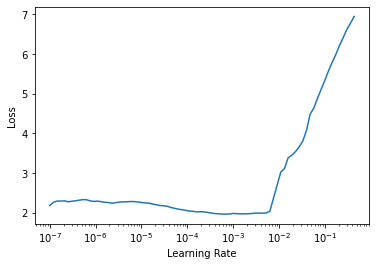

In [34]:
learn.lr_find()

In [35]:
learn.fit_one_cycle(1, 1e-6)

epoch,train_loss,valid_loss,perplexity,accuracy,time
0,1.463899,1.402743,4.066340,0.722965,3:28:45


/opt/tljh/user/lib/python3.7/site-packages/fastai2/callback/schedule.py:68: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idx = (pos >= pcts).nonzero().max()


In [36]:
df_valid.head(1)

,text
0,"def get_vid_from_url(url):\n """"""Extracts video ID from URL.\n """"""\n return match1(url, r'youtu\.be/([^?/]+)') or \\n match1(url, r'youtube\.com/embed/([^/?]+)') or \\n match1(url, r'youtube\.com/v/([^/?]+)') or \\n match1(url, r'youtube\.com/watch/([^/?]+)') or \\n parse_query_param(url, 'v') or \\n parse_query_param(parse_query_param(url, 'u'), 'v')\n\n\ndef sina_xml_to_url_list(xml_data):\n """"""str->list\n Convert XML to URL List.\n From Biligrab.\n """"""\n rawurl = []\n dom = parseString(xml_data)\n for node in dom.getElement..."


In [37]:
prompt = "\n = Unicorn = \n \n A unicorn is a magical creature with a rainbow tail and a horn"

In [38]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 21])

In [39]:
preds = learn.model.generate(inp, max_length=40, num_beams=5, temperature=1.5)

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


In [40]:
tokenizer.decode(preds[0].cpu().numpy())
# tokenizer.decode(preds[0])

'\n = Unicorn = \n \n A unicorn is a magical creature with a rainbow tail and a horn.\n                 '

In [41]:
preds

tensor([[  198,   796, 39481,   796,   220,   198,   220,   198,   317, 44986,
           318,   257, 10883,  7185,   351,   257, 27223,  7894,   290,   257,
         12718,    13,   198,   220,   220,   220,   220,   220,   220,   220,
           220,   220,   220,   220,   220,   220,   220,   220,   220,   220]],
       device='cuda:1')

In [42]:
preds[0]

tensor([  198,   796, 39481,   796,   220,   198,   220,   198,   317, 44986,
          318,   257, 10883,  7185,   351,   257, 27223,  7894,   290,   257,
        12718,    13,   198,   220,   220,   220,   220,   220,   220,   220,
          220,   220,   220,   220,   220,   220,   220,   220,   220,   220],
       device='cuda:1')

In [43]:
prompt = "import"
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape
preds = learn.model.generate(inp, max_length=40, num_beams=5, temperature=1.5)
tokenizer.decode(preds[0].cpu().numpy())

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


'import,\n                                     '

In [44]:
prompt = "\n = import = \n \n import"
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape
preds = learn.model.generate(inp, max_length=40, num_beams=5, temperature=1.5)
tokenizer.decode(preds[0].cpu().numpy())

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


'\n = import = \n \n import os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os'

In [45]:
# learn.save('fine_tuned')
learn.save('20200813_fit_head_gpt2_model')

In [46]:
learn.load('20200813_fit_head_gpt2_model');

In [47]:
learn.unfreeze()

In [48]:
learn.fit_one_cycle(10, 1e-6)

epoch,train_loss,valid_loss,perplexity,accuracy,time
0,1.474935,1.387162,4.003471,0.725250,3:29:45
1,1.445614,1.346338,3.843327,0.731403,3:30:46
2,1.403791,1.317798,3.735186,0.735842,3:30:50
3,1.314907,1.298929,3.665368,0.738622,3:31:25
4,1.282093,1.285895,3.617904,0.740896,3:31:11
5,1.195681,1.278974,3.592950,0.742029,3:31:17
6,1.112404,1.273516,3.573396,0.743075,3:31:36
7,1.230429,1.269817,3.560201,0.743438,3:31:22
8,1.345940,1.268315,3.554858,0.743686,3:31:09
9,1.407818,1.268246,3.554613,0.743738,3:31:04


In [49]:
learn.save('20200813_fine_tuned_gpt2_model')

In [50]:
print(learn.summary()) 

GPT2LMHeadModel (Input shape: ['4 x 1024'])
Layer (type)         Output Shape         Param #    Trainable 
Embedding            4 x 1024 x 768       38,597,376 True      
________________________________________________________________
Embedding            4 x 1024 x 768       786,432    True      
________________________________________________________________
Dropout              4 x 1024 x 768       0          False     
________________________________________________________________
LayerNorm            4 x 1024 x 768       1,536      True      
________________________________________________________________
Conv1D               4 x 1024 x 2304      1,771,776  True      
________________________________________________________________
Conv1D               4 x 1024 x 768       590,592    True      
________________________________________________________________
Dropout              4 x 12 x 1024 x 102  0          False     
______________________________________________________